- gender 성별
- age 나이
- height 키
- weight 몸무게
- eyesight(left, right) 왼쪽 시력, 오른쪽 시력
- hearing(left, right) 왼쪽 청력, 오른쪽 청력

- systolic 최고혈압(대동맥 내로 보내지는 심실 수축기의 혈압)
- relaxation 최저혈압
- fasting blood sugar 공복혈당
- Cholesterol 총 콜레스테롤
- triglyceride 중성지방
- HDL 고밀도지단백 (콜레스테롤)
- LDL 저밀도지단백 (콜레스테롤)
- hemoglobin 헤모글로빈 수치
- Urine protein 단백뇨
- serum creatinine 혈액 또는 소변에서 크레아티닌 양 측정 - *신장*관련

- AST 아스파르테이트 아미노 전달효소 *간*
- ALT 알라닌 아미노 전달효소 *간* 
    - AST, ALT의 정상 범위 ~40, 경도 40~ 200, 중등도 200~400, 중증 400~
- Gtp 감마 Gtp간 기능 검사 *알코올 관련*
    - 정상 ~50, 가벼운 증가 51~100, 중간정도의 증가 101~200, 고도의 증가 201~500, 초고도 증가 500~
    - 술 마시지 않는 사람도 높게 나올 수 있다.
    
- oral 구강검사 여부
- dental caries 충치 갯수
- tartar 치석존재여부

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [8]:
df = pd.read_csv('C:/ds_work/ML_DATA/smoking.csv')
df.shape  # (55693, 27)

(55692, 27)

In [9]:
# 범주형 데이터 변환
df = df.replace({'N':0,'Y':1,'F':0,'M':1, })
gender = {'F': 0, 'M': 1}
oral = {'N': 0, 'T': 1}
tartar = {'N': 0, 'T': 1}
# df 전체 float형으로 바꾸기
df = df.astype(float)

In [10]:
target = df.loc[:, 'smoking']
target

0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
55687    0.0
55688    0.0
55689    0.0
55690    0.0
55691    1.0
Name: smoking, Length: 55692, dtype: float64

In [11]:
### 간 데이터프레임 ###

df_li = df.iloc[:, 20:23]
#df_li

liver=pd.concat([df_li,target], axis=1)
liver

,AST,ALT,Gtp,smoking
0,18.0,19.0,27.0,0.0
1,22.0,19.0,18.0,0.0
2,21.0,16.0,22.0,1.0
3,19.0,26.0,18.0,0.0
4,16.0,14.0,22.0,0.0
...,...,...,...,...
55687,14.0,7.0,10.0,0.0
55688,20.0,12.0,14.0,0.0
55689,17.0,11.0,12.0,0.0
55690,20.0,19.0,18.0,0.0


In [17]:
### 심혈관 및 호흡 데이터프레임 ###

df_bl = df.iloc[:, 10:18]
df_bl
blood = pd.concat([df_bl, target], axis = 1)
blood

,systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin
0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9
1,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7
2,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8
3,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7
4,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5
...,...,...,...,...,...,...,...,...
55687,110.0,68.0,89.0,213.0,99.0,75.0,118.0,12.3
55688,101.0,62.0,89.0,166.0,69.0,73.0,79.0,14.0
55689,117.0,72.0,88.0,158.0,77.0,79.0,63.0,12.4
55690,133.0,76.0,107.0,210.0,79.0,48.0,146.0,14.4


,systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,smoking
0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,0.0
1,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,0.0
2,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0
3,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,0.0
4,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,0.0
...,...,...,...,...,...,...,...,...,...
55687,110.0,68.0,89.0,213.0,99.0,75.0,118.0,12.3,0.0
55688,101.0,62.0,89.0,166.0,69.0,73.0,79.0,14.0,0.0
55689,117.0,72.0,88.0,158.0,77.0,79.0,63.0,12.4,0.0
55690,133.0,76.0,107.0,210.0,79.0,48.0,146.0,14.4,0.0


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(liver.iloc[:,:-1],liver.iloc[:,-1], test_size=0.2, random_state=42)

In [79]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()

X_train = rbs.fit_transform(X_train)
X_test = rbs.transform(X_test)

### 3. 훈련01 : 전체 모델 구현으로 정확도 확인

{'whiskers': [<matplotlib.lines.Line2D at 0x23274b2ed30>,
 'caps': [<matplotlib.lines.Line2D at 0x23274b3b310>,
 'boxes': [<matplotlib.lines.Line2D at 0x23274b2ea60>],
 'medians': [<matplotlib.lines.Line2D at 0x23274b3b8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23274b3bbb0>],
 'means': []}

Text(0.5, 1.0, 'systolic')

{'whiskers': [<matplotlib.lines.Line2D at 0x23274e24af0>,
 'caps': [<matplotlib.lines.Line2D at 0x23274e24f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x23274e24820>],
 'medians': [<matplotlib.lines.Line2D at 0x23274e2e550>],
 'fliers': [<matplotlib.lines.Line2D at 0x23274e2e820>],
 'means': []}

Text(0.5, 1.0, 'relaxation')

{'whiskers': [<matplotlib.lines.Line2D at 0x23274e6b550>,
 'caps': [<matplotlib.lines.Line2D at 0x23274e6baf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23274e6b280>],
 'medians': [<matplotlib.lines.Line2D at 0x23274e760d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23274e763a0>],
 'means': []}

Text(0.5, 1.0, 'fastingbloodsugar')

{'whiskers': [<matplotlib.lines.Line2D at 0x23275e92130>,
 'caps': [<matplotlib.lines.Line2D at 0x23275e925b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23274ea6e20>],
 'medians': [<matplotlib.lines.Line2D at 0x23275e92b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x23275e92e20>],
 'means': []}

Text(0.5, 1.0, 'Cholesterol')

{'whiskers': [<matplotlib.lines.Line2D at 0x23275ecfdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x23275edb280>,
 'boxes': [<matplotlib.lines.Line2D at 0x23275ecfaf0>],
 'medians': [<matplotlib.lines.Line2D at 0x23275edb820>],
 'fliers': [<matplotlib.lines.Line2D at 0x23275edbaf0>],
 'means': []}

Text(0.5, 1.0, 'triglyceride')

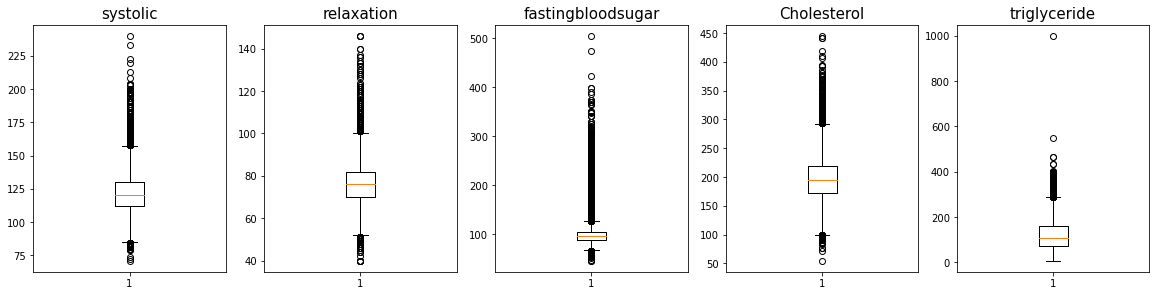

In [75]:
#이상치 확인

import matplotlib.pyplot as plt
import numpy as np

systolic = df['systolic']
relaxation = df['relaxation']
fastingbloodsugar = df['fasting blood sugar']
Cholesterol = df['Cholesterol']
triglyceride = df['triglyceride']

fig = plt.figure(figsize=(20, 10))
ax01 = fig.add_subplot(2, 5, 1)

ax01.boxplot(systolic)
plt.title("systolic", fontsize = 15)

ax02 = fig.add_subplot(2, 5, 2)

ax02.boxplot(relaxation)
plt.title("relaxation", fontsize = 15)

ax03 = fig.add_subplot(2, 5, 3)

ax03.boxplot(fastingbloodsugar)
plt.title("fastingbloodsugar", fontsize = 15)

ax04 = fig.add_subplot(2, 5, 4)

ax04.boxplot(Cholesterol)
plt.title("Cholesterol", fontsize = 15)

ax05 = fig.add_subplot(2, 5, 5)

ax05.boxplot(triglyceride)
plt.title("triglyceride", fontsize = 15)

{'whiskers': [<matplotlib.lines.Line2D at 0x23276389130>,
 'caps': [<matplotlib.lines.Line2D at 0x232763896d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2327637de20>],
 'medians': [<matplotlib.lines.Line2D at 0x23276389ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23276389f70>],
 'means': []}

Text(0.5, 1.0, 'HDL')

{'whiskers': [<matplotlib.lines.Line2D at 0x23275f7fe50>,
 'caps': [<matplotlib.lines.Line2D at 0x23275f8c310>,
 'boxes': [<matplotlib.lines.Line2D at 0x23275f7fb80>],
 'medians': [<matplotlib.lines.Line2D at 0x23275f8c8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23275f8cb80>],
 'means': []}

Text(0.5, 1.0, 'LDL')

{'whiskers': [<matplotlib.lines.Line2D at 0x23275fc4af0>,
 'caps': [<matplotlib.lines.Line2D at 0x23275fd20d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23275fc4820>],
 'medians': [<matplotlib.lines.Line2D at 0x23275fd2670>],
 'fliers': [<matplotlib.lines.Line2D at 0x23275fd2940>],
 'means': []}

Text(0.5, 1.0, 'hemoglobin')

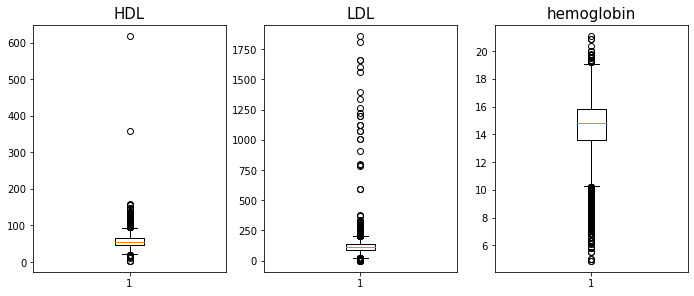

In [76]:
HDL = df['HDL']
LDL = df['LDL']
hemoglobin = df['hemoglobin']

fig = plt.figure(figsize=(20, 10))
ax01 = fig.add_subplot(2, 5, 1)

ax01.boxplot(HDL)
plt.title("HDL", fontsize = 15)

ax02 = fig.add_subplot(2, 5, 2)

ax02.boxplot(LDL)
plt.title("LDL", fontsize = 15)

ax03 = fig.add_subplot(2, 5, 3)
ax03.boxplot(hemoglobin)
plt.title("hemoglobin", fontsize = 15)

{'whiskers': [<matplotlib.lines.Line2D at 0x2327604b2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2327604b850>,
 'boxes': [<matplotlib.lines.Line2D at 0x23276041f70>],
 'medians': [<matplotlib.lines.Line2D at 0x2327604bdf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23276055100>],
 'means': []}

Text(0.5, 1.0, 'AST')

{'whiskers': [<matplotlib.lines.Line2D at 0x23276088070>,
 'caps': [<matplotlib.lines.Line2D at 0x23276088610>,
 'boxes': [<matplotlib.lines.Line2D at 0x2327607cd60>],
 'medians': [<matplotlib.lines.Line2D at 0x23276088bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23276088e80>],
 'means': []}

Text(0.5, 1.0, 'ALT')

{'whiskers': [<matplotlib.lines.Line2D at 0x232760b9cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x232760c7190>,
 'boxes': [<matplotlib.lines.Line2D at 0x232760b9a00>],
 'medians': [<matplotlib.lines.Line2D at 0x232760c7730>],
 'fliers': [<matplotlib.lines.Line2D at 0x232760c7a00>],
 'means': []}

Text(0.5, 1.0, 'Gtp')

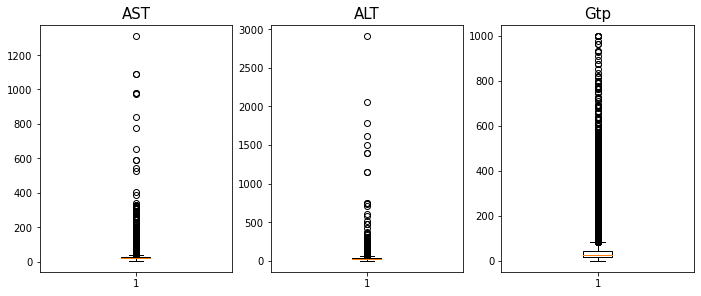

In [77]:
AST = df['AST']
ALT = df['ALT']
Gtp = df['Gtp']

fig = plt.figure(figsize=(20, 10))
ax01 = fig.add_subplot(2, 5, 1)

ax01.boxplot(AST)
plt.title("AST", fontsize = 15)

ax02 = fig.add_subplot(2, 5, 2)

ax02.boxplot(ALT)
plt.title("ALT", fontsize = 15)

ax03 = fig.add_subplot(2, 5, 3)
ax03.boxplot(Gtp)
plt.title("Gtp", fontsize = 15)

In [84]:
Q1 = df[['AST','ALT','Gtp']].quantile(q=0.25)
Q3 = df[['AST','ALT','Gtp']].quantile(q=0.75)
print(Q1)
print(Q3)

IQR = Q3-Q1
IQR

AST    19.0
ALT    15.0
Gtp    17.0
Name: 0.25, dtype: float64
AST    28.0
ALT    31.0
Gtp    43.0
Name: 0.75, dtype: float64


AST     9.0
ALT    16.0
Gtp    26.0
dtype: float64

In [85]:
IQR_df = df[(df['AST'] <= Q3['AST']+1.5*IQR['AST'])&(df['AST']>=Q1['AST']-1.5*IQR['AST'])]
IQR_df = IQR_df[(IQR_df['ALT'] <= Q3['ALT']+1.5*IQR['ALT']) & (IQR_df['ALT'] >= Q1['ALT']-1.5*IQR['ALT'])]
IQR_df = IQR_df[(IQR_df['Gtp'] <= Q3['Gtp']+1.5*IQR['Gtp']) & (IQR_df['Gtp'] >= Q1['Gtp']-1.5*IQR['Gtp'])]
IQR_df = IQR_df[['AST','ALT','Gtp']]

print('df :', len(df))
print('IQR_df :', len(IQR_df))

df : 55692
IQR_df : 47533


<AxesSubplot:>

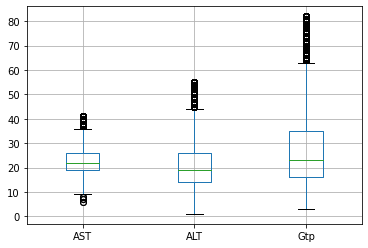

In [86]:
IQR_df.boxplot()

In [87]:
liver = pd.concat([IQR_df, target], axis = 1)
liver

,AST,ALT,Gtp,smoking
0,18.0,19.0,27.0,0.0
1,22.0,19.0,18.0,0.0
2,21.0,16.0,22.0,1.0
3,19.0,26.0,18.0,0.0
4,16.0,14.0,22.0,0.0
...,...,...,...,...
55654,NaN,NaN,NaN,1.0
55657,NaN,NaN,NaN,0.0
55668,NaN,NaN,NaN,1.0
55671,NaN,NaN,NaN,0.0


In [97]:
liver = liver.dropna(axis=0)
liver
liver.isnull().sum()

,AST,ALT,Gtp,smoking
0,18.0,19.0,27.0,0.0
1,22.0,19.0,18.0,0.0
2,21.0,16.0,22.0,1.0
3,19.0,26.0,18.0,0.0
4,16.0,14.0,22.0,0.0
...,...,...,...,...
55687,14.0,7.0,10.0,0.0
55688,20.0,12.0,14.0,0.0
55689,17.0,11.0,12.0,0.0
55690,20.0,19.0,18.0,0.0


AST        0
ALT        0
Gtp        0
smoking    0
dtype: int64

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(liver.iloc[:,:-1],liver.iloc[:,-1], test_size=0.2, random_state=42)

In [99]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()

X_train = rbs.fit_transform(X_train)
X_test = rbs.transform(X_test)

In [100]:
#이상치 IQR을 활용해 제거, 결측치 제거
from sklearn.model_selection import GridSearchCV

from MyModule import girdcvconv as gc

estimator = RandomForestClassifier()

#n_estimators_list = np.arange(100,110)
criterion_list =  ['gini','entropy','log_loss'] 
#splitter_list =  ['best','random']
#max_depth_list =  np.arange(10, 15)
max_features_list = ['auto', 'sqrt', 'log2']
min_samples_split_list = np.arange(2, 20)                                   # 노드 분할 위한 최소 표본수 작으면 과적합, 반대의 경우 과소적합
min_weight_fraction_leaf_list =  np.append(0.0,np.arange(0.1, 0.5, 0.1))    # 비율 커지면 과대적합 줄어듬 0,5보다 작게 해야한다
min_impurity_decrease_list = np.append(0.0,np.arange(0.3, 0.5, 0.1))        # 비율 노드분할 관련

parameter={
    'criterion' : criterion_list ,
    'max_features' : max_features_list,
    'min_samples_split' : min_samples_split_list,
    'min_weight_fraction_leaf' : min_weight_fraction_leaf_list,    
    'min_impurity_decrease' :min_impurity_decrease_list,
    'random_state':[42]

}

model = GridSearchCV(estimator, param_grid=parameter, cv=3, verbose=1, n_jobs=-1, refit=True)
# verbose 출력 실행 모듈
model.fit(X_train,y_train)

print('best_params : ', model.best_params_)
print('best_score_ : ', model.best_score_)

gc.paramsTocsv(data_name='liver_IQR', scaler='RoburtScaler', model_name='RandomForestClassifierr', best_params=model.best_params_, best_score=model.best_score_)

Fitting 3 folds for each of 2430 candidates, totalling 7290 fits


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2430 fits failed out of a total of 7290.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2430 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
   

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_impurity_decrease': array([0. , 0.3, 0.4]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'min_weight_fraction_leaf': array([0. , 0.1, 0.2, 0.3, 0.4]),
                         'random_state': [42]},
             verbose=1)

best_params :  {'criterion': 'entropy', 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'min_samples_split': 19, 'min_weight_fraction_leaf': 0.0, 'random_state': 42}
best_score_ :  0.703176801729609


{'whiskers': [<matplotlib.lines.Line2D at 0x23276149bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x23276159190>,
 'boxes': [<matplotlib.lines.Line2D at 0x232761498e0>],
 'medians': [<matplotlib.lines.Line2D at 0x23276159730>],
 'fliers': [<matplotlib.lines.Line2D at 0x23276159a00>],
 'means': []}

Text(0.5, 1.0, 'dentalcaries')

{'whiskers': [<matplotlib.lines.Line2D at 0x23276191850>,
 'caps': [<matplotlib.lines.Line2D at 0x23276191cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23276191580>],
 'medians': [<matplotlib.lines.Line2D at 0x2327619d2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2327619d580>],
 'means': []}

Text(0.5, 1.0, 'tartar')

{'whiskers': [<matplotlib.lines.Line2D at 0x232761d93d0>,
 'caps': [<matplotlib.lines.Line2D at 0x232761d9970>,
 'boxes': [<matplotlib.lines.Line2D at 0x232761d9100>],
 'medians': [<matplotlib.lines.Line2D at 0x232761d9f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x232761e8220>],
 'means': []}

Text(0.5, 1.0, 'smoking')

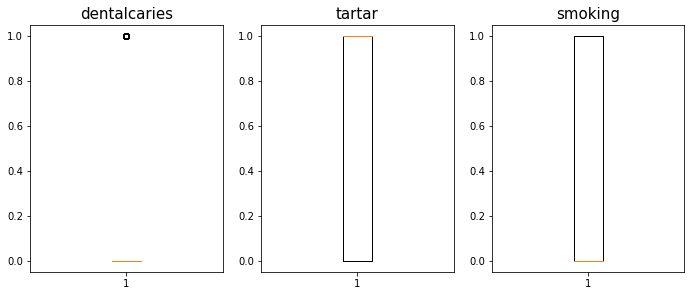

In [78]:
dentalcaries = df['dental caries']
tartar = df['tartar']
smoking = df['smoking']

fig = plt.figure(figsize=(20, 10))
ax01 = fig.add_subplot(2, 5, 1)

ax01.boxplot(dentalcaries)
plt.title("dentalcaries", fontsize = 15)

ax02 = fig.add_subplot(2, 5, 2)

ax02.boxplot(tartar)
plt.title("tartar", fontsize = 15)

ax03 = fig.add_subplot(2, 5, 3)
ax03.boxplot(smoking)
plt.title("smoking", fontsize = 15)

In [101]:
Q1 = df[['dental caries']].quantile(q=0.25)
Q3 = df[['dental caries']].quantile(q=0.75)
print(Q1)
print(Q3)

IQR = Q3-Q1
IQR

dental caries    0.0
Name: 0.25, dtype: float64
dental caries    0.0
Name: 0.75, dtype: float64


dental caries    0.0
dtype: float64

In [105]:
IQR_df = df[(df['dental caries'] <= Q3['dental caries']+1.5*IQR['dental caries'])&(df['dental caries']>=Q1['dental caries']-1.5*IQR['dental caries'])]
IQR_df = IQR_df[['dental caries']]

print('df :', len(df))
print('IQR_df :', len(IQR_df))
print('df :', len(df))
print('IQR_df :', len(IQR_df))

df : 55692
IQR_df : 43811
df : 55692
IQR_df : 43811


<AxesSubplot:>

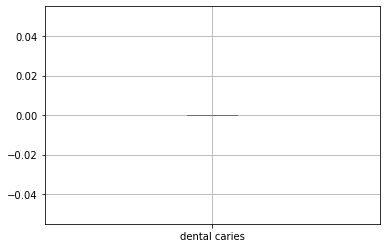

In [106]:
IQR_df.boxplot()

In [82]:
from sklearn.model_selection import GridSearchCV

from MyModule import girdcvconv as gc

estimator = RandomForestClassifier()

#n_estimators_list = np.arange(100,110)
criterion_list =  ['gini','entropy','log_loss'] 
#splitter_list =  ['best','random']
#max_depth_list =  np.arange(10, 15)
max_features_list = ['auto', 'sqrt', 'log2']
min_samples_split_list = np.arange(2, 20)                                   # 노드 분할 위한 최소 표본수 작으면 과적합, 반대의 경우 과소적합
min_weight_fraction_leaf_list =  np.append(0.0,np.arange(0.1, 0.5, 0.1))    # 비율 커지면 과대적합 줄어듬 0,5보다 작게 해야한다
min_impurity_decrease_list = np.append(0.0,np.arange(0.3, 0.5, 0.1))        # 비율 노드분할 관련

parameter={
    'criterion' : criterion_list ,
    'max_features' : max_features_list,
    'min_samples_split' : min_samples_split_list,
    'min_weight_fraction_leaf' : min_weight_fraction_leaf_list,    
    'min_impurity_decrease' :min_impurity_decrease_list,
    'random_state':[42]

}

model = GridSearchCV(estimator, param_grid=parameter, cv=3, verbose=1, n_jobs=-1, refit=True)
# verbose 출력 실행 모듈
model.fit(X_train,y_train)

print('best_params : ', model.best_params_)
print('best_score_ : ', model.best_score_)

gc.paramsTocsv(data_name='liver', scaler='RoburtScaler', model_name='RandomForestClassifierr', best_params=model.best_params_, best_score=model.best_score_)

Fitting 3 folds for each of 2430 candidates, totalling 7290 fits


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2430 fits failed out of a total of 7290.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2430 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
   

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_impurity_decrease': array([0. , 0.3, 0.4]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'min_weight_fraction_leaf': array([0. , 0.1, 0.2, 0.3, 0.4]),
                         'random_state': [42]},
             verbose=1)

best_params :  {'criterion': 'entropy', 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'min_samples_split': 17, 'min_weight_fraction_leaf': 0.0, 'random_state': 42}
best_score_ :  0.6999528651269274


In [ ]:
Q1 = df[['']]

#### DecisionTreeClassifier

DecisionTreeClassifier()

0.7003321662626807

confusion_matrix : 
 [[5752 1275]
 [2063 2049]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

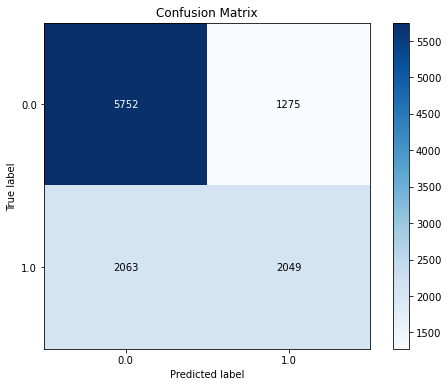

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

#### RandomForestClassifier

RandomForestClassifier()

0.7095789568183859

confusion_matrix : 
 [[5647 1380]
 [1855 2257]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

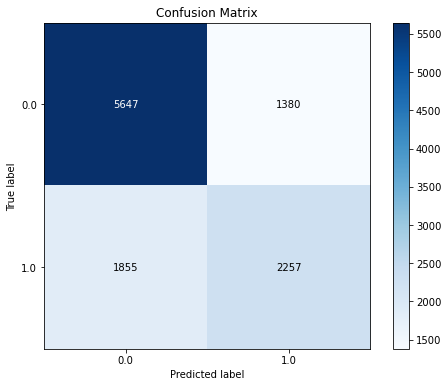

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train,y_train)

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

### XGBoost

[0]	validation_0-logloss:0.64137
[1]	validation_0-logloss:0.61444
[2]	validation_0-logloss:0.59967
[3]	validation_0-logloss:0.59146
[4]	validation_0-logloss:0.58667
[5]	validation_0-logloss:0.58406
[6]	validation_0-logloss:0.58265
[7]	validation_0-logloss:0.58204
[8]	validation_0-logloss:0.58166
[9]	validation_0-logloss:0.58143
[10]	validation_0-logloss:0.58133
[11]	validation_0-logloss:0.58130
[12]	validation_0-logloss:0.58122
[13]	validation_0-logloss:0.58123
[14]	validation_0-logloss:0.58119
[15]	validation_0-logloss:0.58118
[16]	validation_0-logloss:0.58093
[17]	validation_0-logloss:0.58101
[18]	validation_0-logloss:0.58081
[19]	validation_0-logloss:0.58086
[20]	validation_0-logloss:0.58090
[21]	validation_0-logloss:0.58087
[22]	validation_0-logloss:0.58091
[23]	validation_0-logloss:0.58085
[24]	validation_0-logloss:0.58084
[25]	validation_0-logloss:0.58073
[26]	validation_0-logloss:0.58074
[27]	validation_0-logloss:0.58068
[28]	validation_0-logloss:0.58042
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

0.6866864170930963

confusion_matrix : 
 [[5739 1288]
 [2202 1910]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

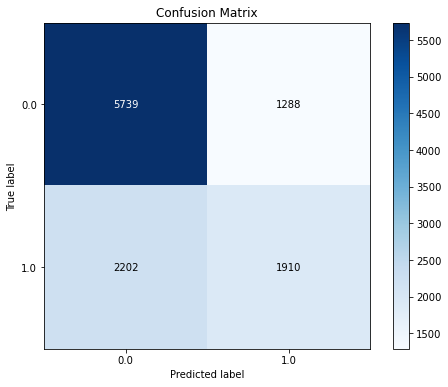

In [29]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier(early_stopping_rounds=10)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set)#, verbose=True

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

In [30]:
# best_iteration
print(model.best_iteration)
print(model.best_score)

from sklearn import metrics
y_pred = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred)

# feature_importances_
#import matplotlib.pyplot as plt 
#model.feature_importances_
#plt.barh(df.iloc[:,:-1].columns, model.feature_importances_)

33
0.5801704771299943


0.5801704792629478

### LGBMClassifier

[1]	valid_0's binary_logloss: 0.644913
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.633826
[3]	valid_0's binary_logloss: 0.624773
[4]	valid_0's binary_logloss: 0.617308
[5]	valid_0's binary_logloss: 0.611228
[6]	valid_0's binary_logloss: 0.606232
[7]	valid_0's binary_logloss: 0.602132
[8]	valid_0's binary_logloss: 0.598714
[9]	valid_0's binary_logloss: 0.595801
[10]	valid_0's binary_logloss: 0.593503
[11]	valid_0's binary_logloss: 0.591989
[12]	valid_0's binary_logloss: 0.590457
[13]	valid_0's binary_logloss: 0.58889
[14]	valid_0's binary_logloss: 0.587697
[15]	valid_0's binary_logloss: 0.586661
[16]	valid_0's binary_logloss: 0.586013
[17]	valid_0's binary_logloss: 0.585389
[18]	valid_0's binary_logloss: 0.584906
[19]	valid_0's binary_logloss: 0.584529
[20]	valid_0's binary_logloss: 0.584296
[21]	valid_0's binary_logloss: 0.583995
[22]	valid_0's binary_logloss: 0.583711
[23]	valid_0's binary_logloss: 0.58359
[24]	valid_0's binary_logloss:

LGBMClassifier(boosting_type='goss', max_depth=5, random_state=0)

0.6831852051351108

confusion_matrix : 
 [[5768 1259]
 [2270 1842]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

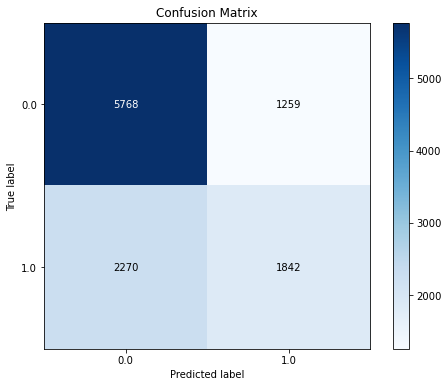

In [31]:
import lightgbm as lgb # 분류 회귀 다 됨
model = lgb.LGBMClassifier(boosting_type='goss',max_depth=5, random_state=0)
eval_set = [(X_test, y_test)]
callbacks = []  # 리스트 객체 사용자함수를 담을 곳
callbacks.append(lgb.early_stopping(stopping_rounds=10)) # 부스팅 반복 횟수 제어
callbacks.append(lgb.log_evaluation())
model.fit(X_train, y_train, eval_set=eval_set, callbacks=callbacks)

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

In [32]:
print(model.best_iteration_)
print(model.best_score_)

40
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('binary_logloss', 0.5826276601015187)])})


In [33]:
from sklearn import metrics
y_pred = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred)

0.5826276601015187

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

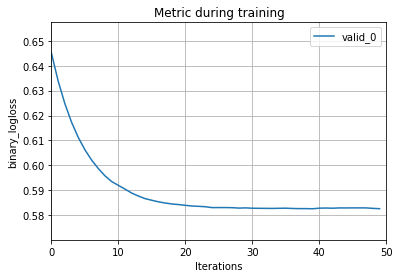

In [34]:
lgb.plot_metric(model)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

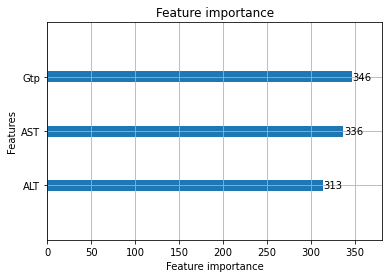

In [35]:
lgb.plot_importance(model)

### Logistic Regression

LogisticRegression(max_iter=10000)

0.6661280186731304

0.6661280186731304

confusion_matrix : 
 [[5768 1259]
 [2270 1842]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

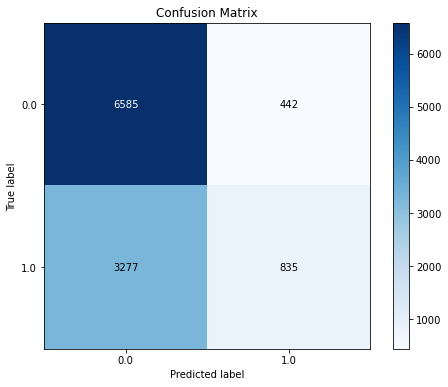

In [37]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(max_iter = 10000)

model2.fit(X_train,y_train)

model2.score(X_test,y_test)
pred_2 = model2.predict(X_test)
acc2 = accuracy_score(y_test,pred_2)
acc2

# 실제 , 예측
cm_2 = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm_2)

skplt.metrics.plot_confusion_matrix(y_test,pred_2,figsize=(8,6))
plt.show()

### Support Vector Machine

SVC()

0.6823772331448066

confusion_matrix : 
 [[6101  926]
 [2612 1500]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

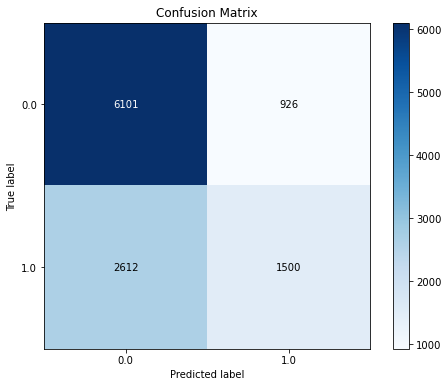

In [38]:
### 모델 - svm ###

from sklearn import svm
from sklearn.metrics import accuracy_score


model = svm.SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred) 
acc 

from sklearn.metrics import confusion_matrix 
import scikitplot as skplt 
pred = model.predict(X_test) # 실제 , 예측 
cm = confusion_matrix(y_test, pred) 
print('confusion_matrix : \n', cm) 
skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6)) 
plt.show()